In [1]:
import pandas as pd


In [3]:
dataframe_raw= pd.read_csv ("/home/ana/workshop2/Data/spotify_dataset.csv")
dataframe_raw.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
#TYPE OF DATA 
dataframe_raw.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [9]:
#How many variables do we have in the data set?
dataframe_raw.shape

(114000, 21)

In [13]:
# Filtrar las columnas numéricas para evitar errores
numeric_columns = dataframe_raw.select_dtypes(include=['float64', 'int64']).columns

# Análisis de valores faltantes en cada columna
missing_values_analysis = dataframe_raw.isnull().sum()
# Análisis de datos atípicos (outliers) usando el método del rango intercuartílico (IQR) en columnas numéricas
Q1 = dataframe_raw[numeric_columns].quantile(0.25)
Q3 = dataframe_raw[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Determinar los valores atípicos (outliers) por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR
outliers = ((dataframe_raw[numeric_columns] < (Q1 - 1.5 * IQR)) | (dataframe_raw[numeric_columns] > (Q3 + 1.5 * IQR)))

# Contar el número de outliers por cada columna numérica
outliers_count = outliers.sum()

# Mostrar el análisis de valores faltantes y de datos atípicos
missing_values_analysis, outliers_count

(Unnamed: 0          0
 track_id            0
 artists             1
 album_name          1
 track_name          1
 popularity          0
 duration_ms         0
 explicit            0
 danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 time_signature      0
 track_genre         0
 dtype: int64,
 Unnamed: 0              0
 popularity              2
 duration_ms          5617
 danceability          620
 energy                  0
 key                     0
 loudness             6173
 mode                    0
 speechiness         13211
 acousticness            0
 instrumentalness    25246
 liveness             8642
 valence                 0
 tempo                 617
 time_signature      12157
 dtype: int64)

Matplotlib is building the font cache; this may take a moment.


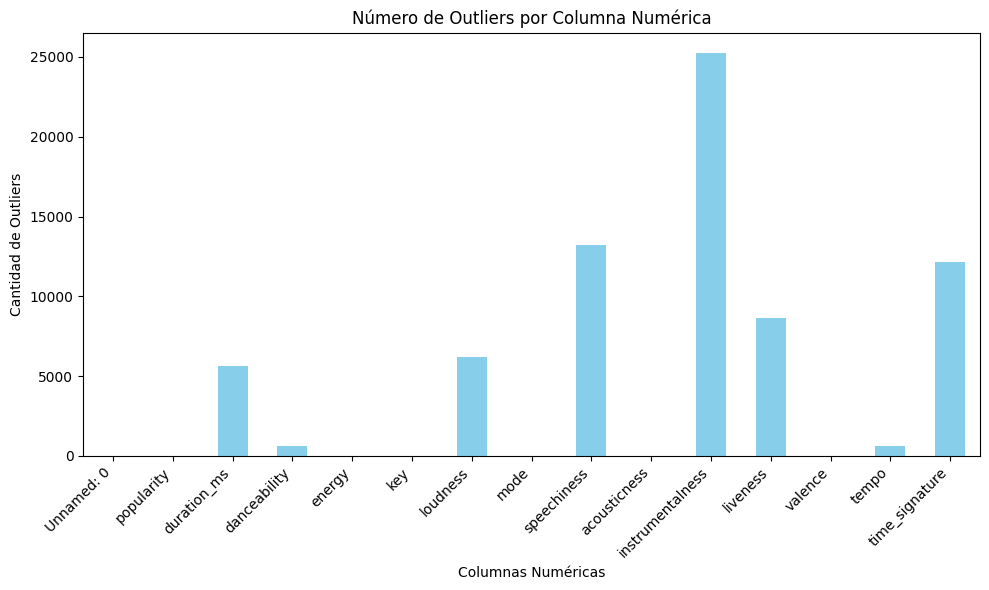

In [14]:
import matplotlib.pyplot as plt

# Graficar los valores atípicos por columna numérica
plt.figure(figsize=(10,6))
outliers_count.plot(kind='bar', color='skyblue')
plt.title('Número de Outliers por Columna Numérica')
plt.xlabel('Columnas Numéricas')
plt.ylabel('Cantidad de Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

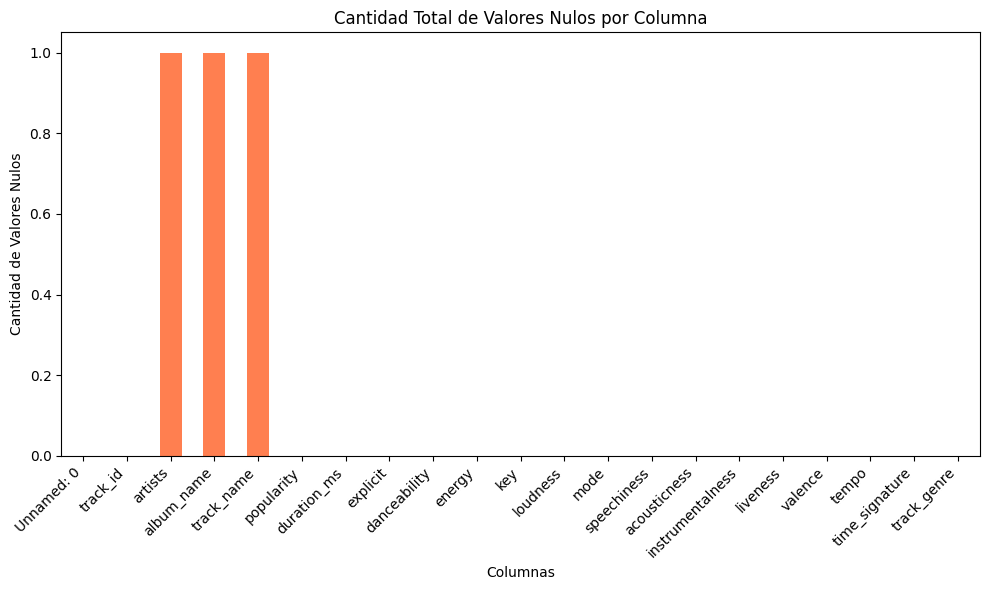

In [15]:
# Crear una gráfica de barras para visualizar la cantidad total de valores nulos por columna
plt.figure(figsize=(10,6))
missing_values_analysis.plot(kind='bar', color='coral')
plt.title('Cantidad Total de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [19]:
# Obtener el resumen estadístico de las columnas numéricas del dataset
summary_statistics = dataframe_raw.describe()

# Mostrar el resumen estadístico
print(summary_statistics)

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

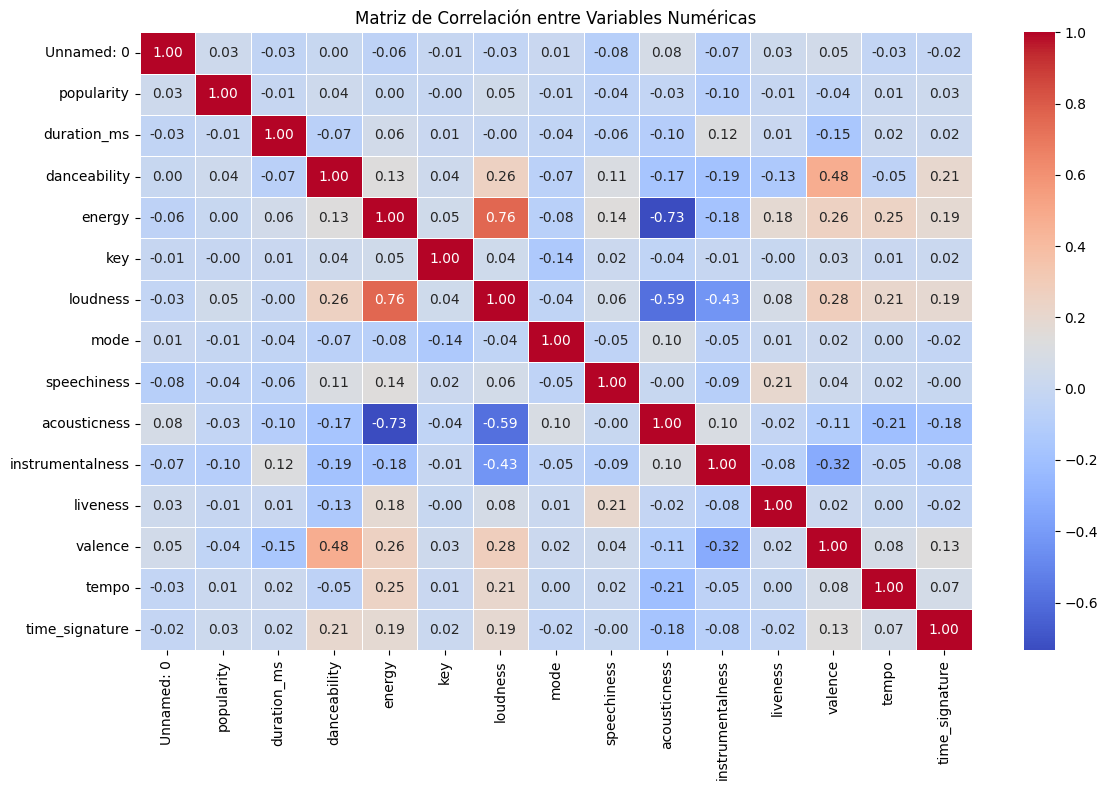

In [21]:
#analisis de correlaciones de variables
import seaborn as sns

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = dataframe_raw[numeric_columns].corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [24]:
# Analizar la columna 'artists' para ver su distribución
artist_counts = dataframe_raw['artists'].value_counts()
print(artist_counts)

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64


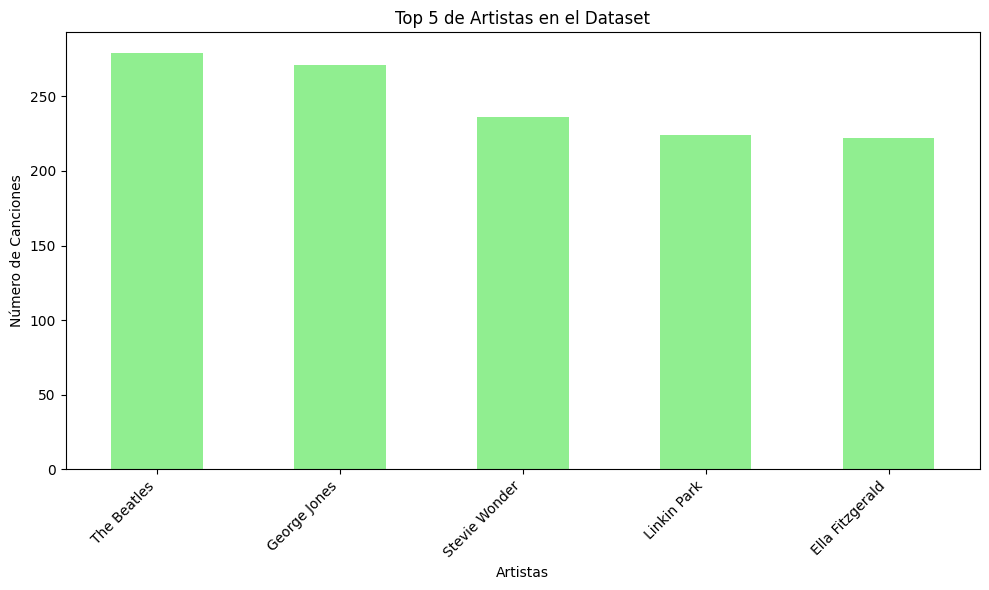

In [22]:
# Contar la frecuencia de los artistas en el dataset
top_artists = dataframe_raw['artists'].value_counts().head(5)

# Crear una gráfica de barras para visualizar el top 5 de artistas
plt.figure(figsize=(10,6))
top_artists.plot(kind='bar', color='lightgreen')
plt.title('Top 5 de Artistas en el Dataset')
plt.xlabel('Artistas')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

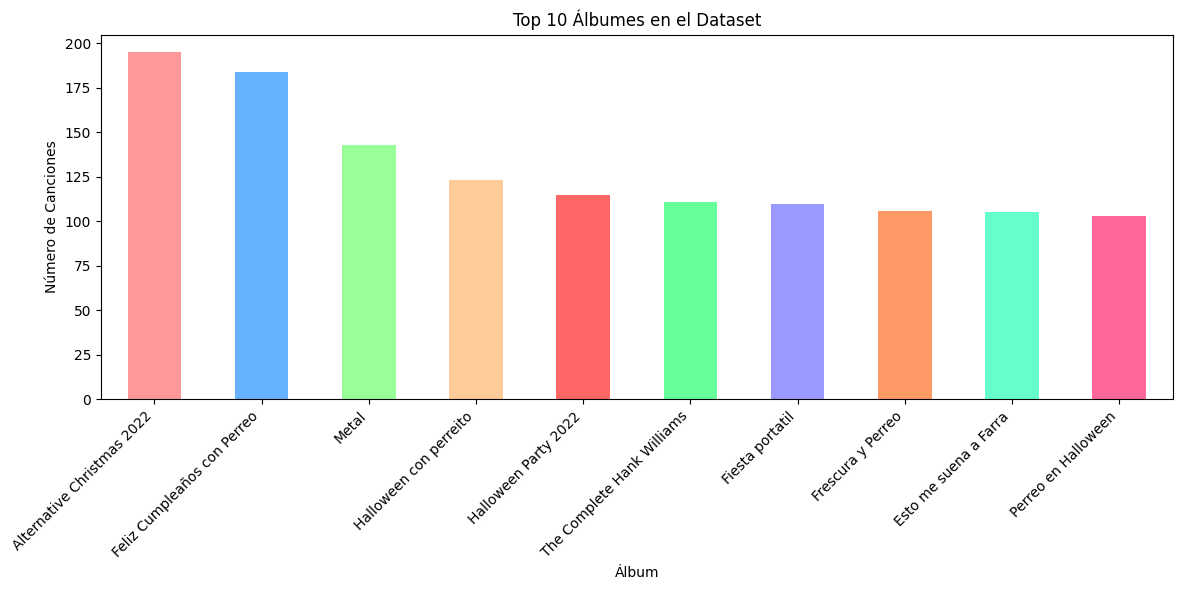

In [25]:
# Analizar la columna 'album_name' para ver su distribución
album_counts = dataframe_raw['album_name'].value_counts()

# Obtener el top 10 de los álbumes más frecuentes
top_10_albums = album_counts.head(10)

# Crear una gráfica de barras para el top 10 de álbumes
plt.figure(figsize=(12,6))
top_10_albums.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666', '#66FF99', '#9999FF', '#FF9966', '#66FFCC', '#FF6699'])
plt.title('Top 10 Álbumes en el Dataset')
plt.xlabel('Álbum')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()